## Importando Bibliotecas

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/teste_indicium_precificacao.csv")
data.head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


In [3]:
data.shape

(48894, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [5]:
print(data.isna().sum())  

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


## Correlação entre Preço e Minímo de noites e Disponibilidade ao longo do ano 

In [16]:

correlacao_linear = data.corr()
correlacao_price = correlacao_linear['price'].sort_values(ascending=False)
print(correlacao_price)

price                            1.000000
disponibilidade_365              0.081833
calculado_host_listings_count    0.057472
minimo_noites                    0.042799
latitude                         0.033939
host_id                          0.015309
id                               0.010618
reviews_por_mes                 -0.030608
numero_de_reviews               -0.047954
longitude                       -0.150020
Name: price, dtype: float64


/tmp/ipykernel_18211/1631188379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao_linear = data.corr()


In [17]:
correlacao_spearman = data.corr(method='spearman')
c = correlacao_spearman['price'].sort_values(ascending=False)
print(c)

price                            1.000000
latitude                         0.136191
minimo_noites                    0.101304
disponibilidade_365              0.086072
reviews_por_mes                 -0.018515
id                              -0.020723
numero_de_reviews               -0.055012
host_id                         -0.071757
calculado_host_listings_count   -0.106108
longitude                       -0.438031
Name: price, dtype: float64


/tmp/ipykernel_18211/3982092327.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao_spearman = data.corr(method='spearman')


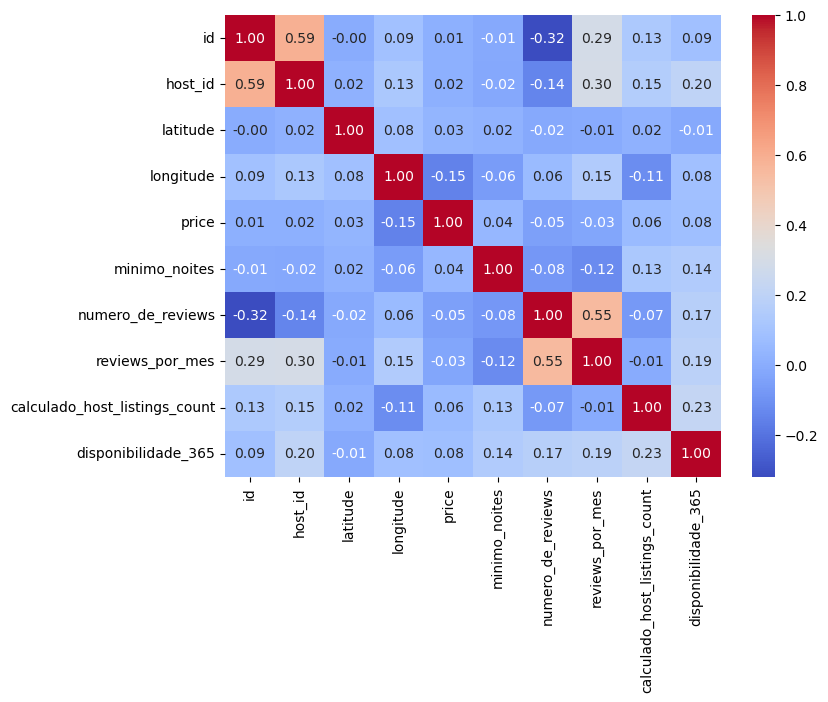

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_linear, annot=True, cmap='coolwarm', fmt='.2f')  # 2 casas decimais
plt.show()


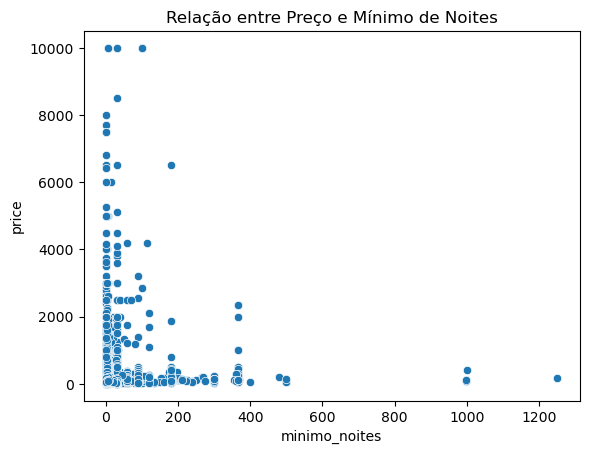

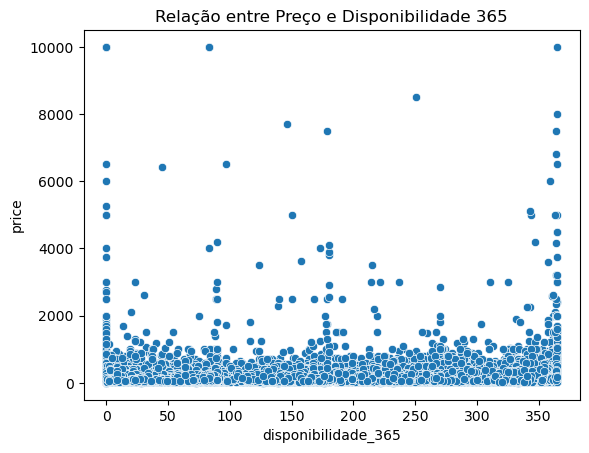

In [13]:
# Gráfico de dispersão entre preço e minimo_noites
sns.scatterplot(x=data['minimo_noites'], y=data['price'])
plt.title('Relação entre Preço e Mínimo de Noites')
plt.show()

# Gráfico de dispersão entre preço e disponibilidade_365
sns.scatterplot(x=data['disponibilidade_365'], y=data['price'])
plt.title('Relação entre Preço e Disponibilidade 365')
plt.show()